## 확률 변수로서의 모델 파라미터

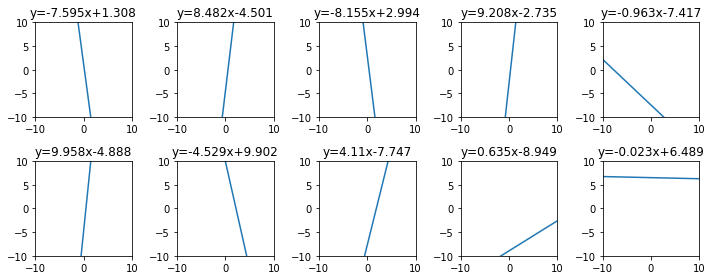

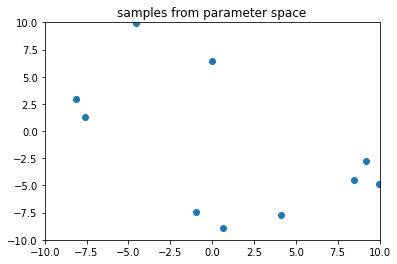

In [1]:
# 파라미터 공간에서 두 점 a, b를 뽑아 y=ax+b의 그래프를 그리는 코드
#실수 집합 전체에서 샘플링을 해야 하지만 코드로 구현하기가 불가능하기에
#간단한 시각화를 위해 [-10, 10)[−10,10) 구간에서 샘플링

import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

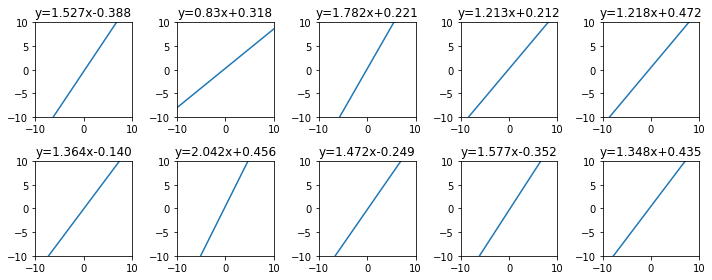

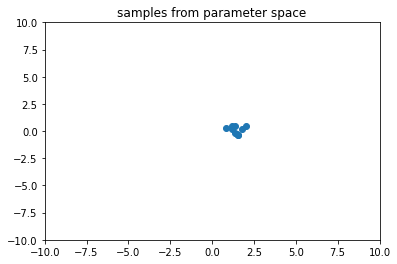

In [2]:
#평균이 (1,0)(1,0)이고 표준편차가 0.5인 정규분포에서 10개의 점을 무작위로 뽑은 다음, 
#대응되는 일차함수의 그래프를 각각 그려주는 코드

parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## 베이지안 머신러닝 모델
- 데이터를 통해 파라미터 공간의 확률 분포를 학습.
- 모델 파라미터를 고정된 값이 아닌 불확실성(uncertainty)을 가진 확률 변수로 보는 것.
- 데이터를 관찰하면서 업데이트되는 값으로 보는 것은 베이지안 머신러닝의 핵심 아이디어임.

### 사전 확률(prior probability)
- 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포.
- prior는 일반적인 정규분포가 될 수도 있고, 데이터의 특성이 반영된 특정 확률 분포가 될 수도 있음.
- prior 분포를 고정시킨다면, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있음.
- 이것을 나타내는 값이 likelihood(가능도, 우도)

### 가능도(우도, likelihood)
- likelihood가 높다는 것은 곧 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것.
- 데이터의 분포를 모델이 잘 표현하는 것이라고 생각할 수 있음.
-  데이터들의 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 최대 가능도 추정(maximum likelihood estimation, MLE)이라고 함.
- 데이터 포인트가 모델 함수에서 멀어질수록 데이터의 likelihood는 기하급수적으로 감소함.
- 측값과 라벨의 차이가 조금만 벌어져도 likelihood 값은 민감하게 반응하는 것.

### 사후 확률(posterior probability)
- 데이터 집합 X가 주어졌을 때 파라미터 θ의 분포.
- 데이터를 관찰한 후 계산되는 확률이라는 의미.
-  posterior를 직접 계산해서 최적의 θ 값을 찾는 것이 아니라, prior와 likelihood에 관한 식으로 변형한 다음, 그 식을 최대화하는 파라미터θ를 찾음.
- 이렇게 posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 최대 사후 확률 추정(maximum a posteriori estimation, MAP)이라고 함.

## likelihood 감 잡기

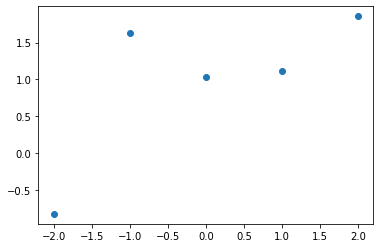

In [3]:
#5개의 랜덤한 데이터 포인트를 생성하고 좌표평면 위에 표시해주는 코드

import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

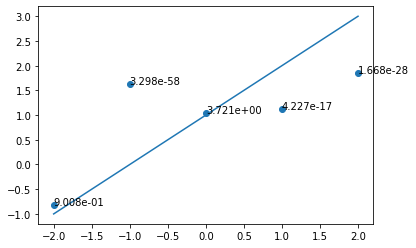

In [4]:
#일차함수 모델의 식을 바꾸어가며 데이터 포인트 5개의 likelihood 값이 각각 어떻게 바뀌는지 

#노이즈 분포의 표준편차는 데이터의 실제 분포와 관련된 값이라 알 수 없지만, 
#다음 스텝에서 공부할 MLE를 사용하면 표준편차를 알지 못해도 최적의 파라미터 값을 찾을 수 있음.


# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

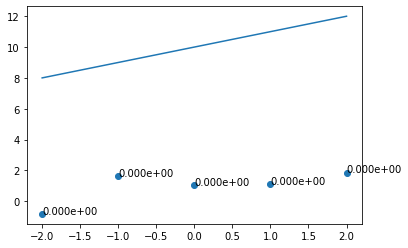

In [5]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 10
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

- 데이터 포인트 옆에 있는 숫자는 likelihood 값이고, 직선은 모델이 표현하는 함수의 그래프임.

## MLE : 최대 가능도 추론
- 좋은 머신러닝 모델은 하나의 데이터에 대해서만 likelihood가 큰 모델이 아니라, 데이터셋에 있는 모든 데이터 포인트의 likelihood 값을 크게 만드는 모델임.
- MLE를 실제로 적용할 때는 likelihood 대신 log likelihood를 최대화하는 파라미터를 구함.
- 데이터셋의 likelihood가 데이터 포인트 각각의 likelihood를 곱한 형태인데, 로그를 씌우면 곱셈 연산이 덧셈 연산으로 바뀌면서 미분 계산이 편리해짐.

### - i.i.d :
우리가 가지고 있는 데이터 포인트는 서로 독립이고(independent) 같은 확률 분포를 따른다고(identically distributed) 가정하는 이 조건을 independent and identically distributed, 줄여서 i.i.d.라고 부름.
-  머신러닝 문제에서 꼭 필요한 전제조건

## MLE 최적해 구하기
- MLE를 이용해 최적의 파라미터를 찾아보고 데이터셋의 likelihood도 계산해 볼 것.

### - 데이터셋 생성

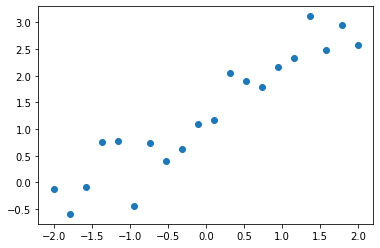

In [6]:
#y=x+1 함수를 기준으로 랜덤한 노이즈를 섞어서 데이터 포인트 20개를 생성하고 시각화하는 코드
#데이터 생성 단계에서 지정한 노이즈의 분포는 평균이 0이고 표준편차가 0.5인 정규분포

import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

### - likelihood와 파라미터 계산

In [7]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


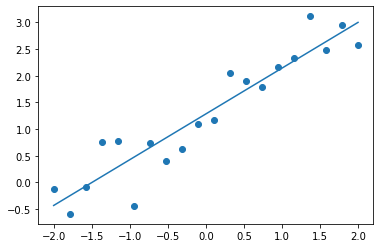

In [8]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

- 위 코드로 구한 최적의 모델은 y=0.8578x+1.2847임.
- 데이터 포인트들이 y=x+1 함수로부터 생성된 것을 생각하면 꽤 가까운 결과가 나옴.

## MAP : 최대 사후 확률 추정
- 머신러닝 모델의 최적 파라미터를 찾는 방법 중 하나

### - prior 분포의 등장
- MLE의 최적해는 오로지 관측된 데이터 값에만 의존함.
-  관측된 데이터에 노이즈가 많이 섞여 있는 경우, 이상치(outlier) 데이터가 존재하는 경우에는 모델의 안정성이 떨어진다는 단점이 있음.
- prior 분포 p(θ)는 관찰된 데이터가 없을 때 파라미터 공간에 주어진 확률 분포임.
- posterior를 최대화하는 파라미터 대신 negative log posterior를 최소화하는 파라미터 값을 구함.

### - MAP as L2 regularization
- 파라미터 분포를 평균이 (0,0)(0,0)인 정규분포로 놓아서 파라미터들이 각각 0에 가까운 값으로 학습되도록 제약 조건을 걸어줌.
- 파라미터 분포를 다른 확률 분포로 정한다면 L2 정규화와는 식이 달라질 수 있지만, 파라미터 값에 특정한 제약 조건을 준다는 점에서 효과가 같음.

## MLE와 MAP의 비교
- MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior 부분이 존재한다는 차이가 있음.
- 그래서 MLE 모델보다 MAP 모델이 더 안정적임.
- 이상치(outlier)가 있는 데이터셋을 이용해서 MAP와 MLE를 비교할 수 있음.

### - 데이터셋 생성

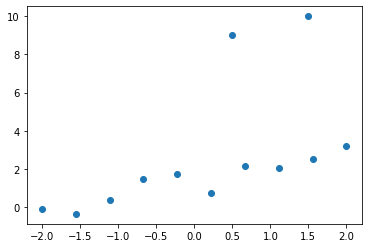

In [9]:
# y=x+1함수값에 랜덤한 노이즈를 더해서 데이터 포인트들을 생성
#이상치 데이터 한 개를 데이터 포인트 20개를 추가하는 것으로는 모델에 영향X
#데이터 포인트를 10개로, 이상치 데이터를 2개 추가

import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

- 그래프에서 (0.5, 9)(0.5,9), (1.5, 10)(1.5,10) 위치의 이상치 데이터를 확인할 수 있음.

### - 파라미터 계산
- 파라미터 분포의 표준편차를 작게 잡을수록 파라미터 값에 대한 제약 조건을 강하게 걸어주는 것과 같음.
- 정규화 측면에서 봐도 정규화 상수 값이 클수록 모델의 유연성은 감소함.

In [10]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


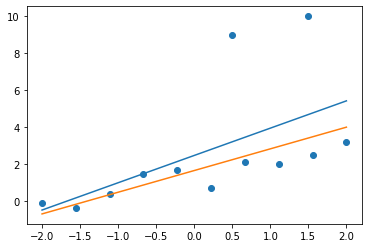

In [11]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

- 파란색 직선과 주황색 직선은 각각 MLE, MAP를 이용해 찾은 모델.
- 파란색 직선은 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어남.
- 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않음.
- 원래 데이터 분포에서 멀리 떨어진 이상치 데이터가 추가되었기 때문에, likelihood의 값은 언더플로우가 발생해서 0으로 표시됨.
- negative log likelihood의 값을 보면 MLE 결과와 MAP 결과를 비교할 수 있음.
- MAP가 MLE에 비해 negative log likelihood 값이 크지만(likelihood가 작지만), 이상치 데이터가 추가되었을 때 모델 파라미터의 변화는 MLE보다 작음.